<span style="font-size:24px;"> **Exploratory Visual Analysis using Python**</span>

<span style="font-size:20px;"> **Petrakos Nikolaos, mpked2230**</span>

In this file we will apply a basic exploratory visual analysis on Airbnb listings data for the city of Athens, Greece. Out of the available files included in the link: http://insideairbnb.com/get-the-data/, we will be analyzing the data found in "listings.csv.gz" and the "calendar.csv.gz" files.

As suggested, we will initially examine the datasets and proceed with any necessary preprocessing in order to prepare the data for analysis. All the actions that we follow are described in each respective step below.

We start by importing all necessary libraries.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium

Next, we download the 'listings.csv.gz' file and export it to 'listings.csv'. Then, we use Pandas to convert it into a dataframe and print it's type to verify.

In [2]:
df_listings = pd.read_csv('listings.csv')

# Output object type
type(df_listings)

pandas.core.frame.DataFrame

We use the "info" method to have a summary of the dataset's information.

In [3]:
df_listings.info(verbose=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11382 entries, 0 to 11381
Columns: 75 entries, id to reviews_per_month
dtypes: float64(17), int64(23), object(35)
memory usage: 6.5+ MB


Now we print the first 3 rows of the dataset.

In [4]:
df_listings.head(3)

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,10595,https://www.airbnb.com/rooms/10595,20230327145512,2023-03-28,city scrape,"3 bedrooms, 2 bathrooms, 2nd floor with elevator",The apartment is 3-bedroom apartment with 2-ba...,Ampelokipi district is nice multinational and ...,https://a0.muscache.com/pictures/f7e19a44-5afe...,37177,...,4.87,4.56,4.72,00000957568,t,7,7,0,0,0.27
1,571492,https://www.airbnb.com/rooms/571492,20230327145512,2023-03-28,city scrape,"Acropolis Alpha, 4bd4ba, Great Friendly Hosts!","Acropolis Alpha features 4 bedrooms, 4 bathroo...",Wondering what our Athens neighborhood is like...,https://a0.muscache.com/pictures/prohost-api/H...,2810938,...,4.95,4.71,4.57,00001188074,t,4,4,0,0,0.17
2,571876,https://www.airbnb.com/rooms/571876,20230327145512,2023-03-28,city scrape,"Vintage Apartment Athens, Plaka (Historic Center)",Ground Floor 50sqm Vintage Style Apartment w/e...,Our neighborhood is totally safe and very quit...,https://a0.muscache.com/pictures/fd5c20ae-1e60...,2814842,...,4.97,4.97,4.81,00000439557,t,1,1,0,0,3.11


Since we have many columns that were not displayed using the 'head' method, we use an alternative method to show all columns of the dataset.

In [5]:
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 2000)

print(df_listings)

                       id                                      listing_url       scrape_id last_scraped       source                                               name                                        description                              neighborhood_overview                                        picture_url    host_id                                     host_url   host_name  host_since   host_location                                         host_about host_response_time host_response_rate host_acceptance_rate host_is_superhost                                 host_thumbnail_url                                   host_picture_url host_neighbourhood  host_listings_count  host_total_listings_count                host_verifications host_has_profile_pic host_identity_verified           neighbourhood  neighbourhood_cleansed  neighbourhood_group_cleansed   latitude  longitude       property_type        room_type  accommodates  bathrooms bathrooms_text  bedrooms  beds                

Now we check to see how many null or missing values we have for every column in the dataset as follows:

In [6]:
df_listings.isna().sum(axis=0)

id                                                 0
listing_url                                        0
scrape_id                                          0
last_scraped                                       0
source                                             0
                                                ... 
calculated_host_listings_count                     0
calculated_host_listings_count_entire_homes        0
calculated_host_listings_count_private_rooms       0
calculated_host_listings_count_shared_rooms        0
reviews_per_month                               1938
Length: 75, dtype: int64

We do the same for the rows, respectively.

In [7]:
df_listings.isna().sum(axis=1)

0         3
1         3
2         4
3         5
4         3
         ..
11377    19
11378    14
11379    16
11380    17
11381    16
Length: 11382, dtype: int64

Next, we will be removing any empty rows and columns in the dataset. Based on the result of this action, 3 columns are removed. We will not be removing any more columns at this stage, as the size of the dataset is not large enough to cause delays during our analysis. 

In [8]:
# delete empty columns
df_listings.dropna(how='all', axis=1, inplace=True)

# delete empty rows
df_listings.dropna(how='all', axis=0, inplace=True)

df_listings.shape

(11382, 72)

We now print the type and the first 3 values of the 'price' column, in order to check if any changes are needed to be applied so it can be used for our visuals.

In [9]:
print(df_listings['price'].head(3))

0     $60.00
1    $526.00
2     $40.00
Name: price, dtype: object


We want to remove the '$' symbol from this column and also convert the values to float format, so they can be used as price values.

In [10]:
df_listings['price'] = df_listings['price'].replace('[\$,]', '', regex=True).astype(float)

We then check for any missing values in the column.

In [11]:
missing_values = df_listings['price'].isnull().sum()
print(f"Number of missing values in 'price' column: {missing_values}")


Number of missing values in 'price' column: 0


Now we are ready to produce our first visual. We want to check the average listings prices per neighbourhood, so we will initially print the unique values found in the 'neighbourhood_cleansed' column to display all neighbourhoods in the Athens region and calculate their size.

In [12]:
df_listings.neighbourhood_cleansed.unique()

array(['ΑΜΠΕΛΟΚΗΠΟΙ', 'ΓΟΥΒΑ', 'ΕΜΠΟΡΙΚΟ ΤΡΙΓΩΝΟ-ΠΛΑΚΑ', '1Ο ΝΕΚΡΟΤΑΦΕΙΟ',
       'ΠΡΟΜΠΟΝΑ', 'ΚΕΡΑΜΕΙΚΟΣ', 'ΑΓΙΟΣ ΝΙΚΟΛΑΟΣ', 'ΓΟΥΔΙ', 'ΑΚΡΟΠΟΛΗ',
       'ΣΤΑΔΙΟ', 'ΓΚΑΖΙ', 'ΑΓΙΟΣ ΚΩΝΣΤΑΝΤΙΝΟΣ-ΠΛΑΤΕΙΑ ΒΑΘΗΣ',
       'ΝΕΑ ΚΥΨΕΛΗ', 'ΚΟΛΩΝΑΚΙ', 'ΠΑΓΚΡΑΤΙ', 'ΜΟΥΣΕΙΟ-ΕΞΑΡΧΕΙΑ-ΝΕΑΠΟΛΗ',
       'ΝΕΟΣ ΚΟΣΜΟΣ', 'ΚΟΛΩΝΟΣ', 'ΠΑΤΗΣΙΑ', 'ΘΗΣΕΙΟ', 'ΝΙΡΒΑΝΑ',
       'ΑΝΩ ΠΑΤΗΣΙΑ', 'ΠΛΑΤΕΙΑ ΑΜΕΡΙΚΗΣ', 'ΠΛΑΤΕΙΑ ΑΤΤΙΚΗΣ',
       'ΚΟΥΚΑΚΙ-ΜΑΚΡΥΓΙΑΝΝΗ', 'ΙΛΙΣΙΑ', 'ΚΥΨΕΛΗ', 'ΑΝΩ ΚΥΨΕΛΗ',
       'ΑΚΑΔΗΜΙΑ ΠΛΑΤΩΝΟΣ', 'ΠΕΤΡΑΛΩΝΑ', 'ΖΑΠΠΕΙΟ', 'ΓΚΥΖΗ', 'ΛΥΚΑΒΗΤΤΟΣ',
       'ΒΟΤΑΝΙΚΟΣ', 'ΑΓΙΟΣ ΕΛΕΥΘΕΡΙΟΣ', 'ΠΕΔΙΟ ΑΡΕΩΣ', 'ΣΕΠΟΛΙΑ',
       'ΠΕΝΤΑΓΩΝΟ', 'ΠΟΛΥΓΩΝΟ', 'ΣΤΑΘΜΟΣ ΛΑΡΙΣΗΣ', 'ΕΛΛΗΝΟΡΩΣΩΝ',
       'ΚΟΛΟΚΥΝΘΟΥ', 'ΡΙΖΟΥΠΟΛΗ', 'ΡΗΓΙΛΛΗΣ'], dtype=object)

In [13]:
df_listings.neighbourhood_cleansed.unique().size

44

<span style="font-size:24px;"> **Bar Chart**</span>

Since we have 44 neighbourhoods in total, we will select the top 15 with the higher average prices to display.

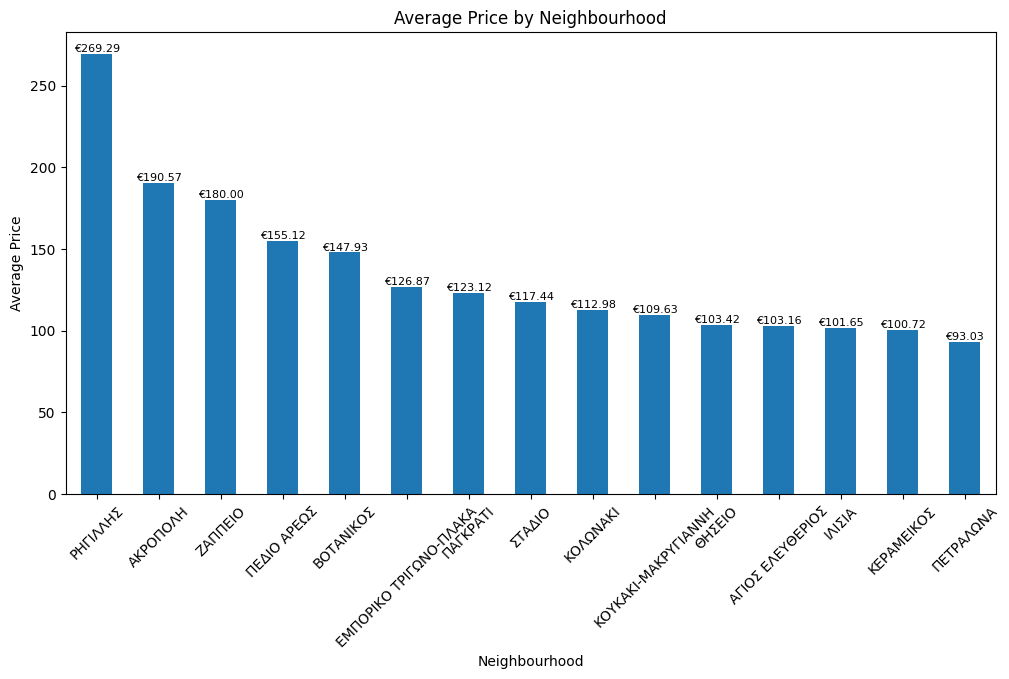

In [34]:
plt.figure(figsize=(12, 6))
average_price_by_neighbourhood = df_listings.groupby('neighbourhood_cleansed')['price'].mean().sort_values(ascending=False)
top_15_neighbourhoods = average_price_by_neighbourhood.head(15)  # Select top 15 neighbourhoods
top_15_neighbourhoods.plot(kind='bar')
plt.title('Average Price by Neighbourhood')
plt.xlabel('Neighbourhood')
plt.ylabel('Average Price')
plt.xticks(rotation=45)

# Adjust x-axis limits
plt.xlim([-0.5, len(top_15_neighbourhoods)-0.5])

# Add value labels to the bars
for i, value in enumerate(top_15_neighbourhoods):
    plt.text(i, value, f'€{value:.2f}', ha='center', va='bottom', fontsize=8)

plt.show()


Based on the above graph, we notice the significant difference in average prices of the 'ΡΗΓΙΛΛΗΣ' neighbourhood compared to it's immediate next one, 'ΑΚΡΟΠΟΛΗ', being 41,3% more expensive.

The differences of average prices for the rest of the neighbourhoods appear to be less significant.

<span style="font-size:24px;"> **Pie Chart**</span>

Next, we will be creating a pie chart to define how many listings are included in each neighbourhood. First, we group them by the same column we used above.

In [15]:
neighbourhood_counts = df_listings.groupby('neighbourhood_cleansed').size()

neighbourhood_counts

neighbourhood_cleansed
1Ο ΝΕΚΡΟΤΑΦΕΙΟ                        45
ΑΓΙΟΣ ΕΛΕΥΘΕΡΙΟΣ                      31
ΑΓΙΟΣ ΚΩΝΣΤΑΝΤΙΝΟΣ-ΠΛΑΤΕΙΑ ΒΑΘΗΣ     678
ΑΓΙΟΣ ΝΙΚΟΛΑΟΣ                        69
ΑΚΑΔΗΜΙΑ ΠΛΑΤΩΝΟΣ                     61
ΑΚΡΟΠΟΛΗ                             348
ΑΜΠΕΛΟΚΗΠΟΙ                          367
ΑΝΩ ΚΥΨΕΛΗ                            94
ΑΝΩ ΠΑΤΗΣΙΑ                           58
ΒΟΤΑΝΙΚΟΣ                             70
ΓΚΑΖΙ                                100
ΓΚΥΖΗ                                 91
ΓΟΥΒΑ                                 59
ΓΟΥΔΙ                                209
ΕΛΛΗΝΟΡΩΣΩΝ                           66
ΕΜΠΟΡΙΚΟ ΤΡΙΓΩΝΟ-ΠΛΑΚΑ              2248
ΖΑΠΠΕΙΟ                              156
ΘΗΣΕΙΟ                               339
ΙΛΙΣΙΑ                               189
ΚΕΡΑΜΕΙΚΟΣ                           315
ΚΟΛΟΚΥΝΘΟΥ                            21
ΚΟΛΩΝΑΚΙ                             374
ΚΟΛΩΝΟΣ                               91
ΚΟΥΚΑΚΙ-ΜΑΚΡΥΓΙΑΝΝΗ               

Now that we have the absolute numbers, we will also display their distribution percentages. Because of the large number of neighbourhoods, we will again show only the top 10 of them and group all the rest in the visual below, for clearer visibility.

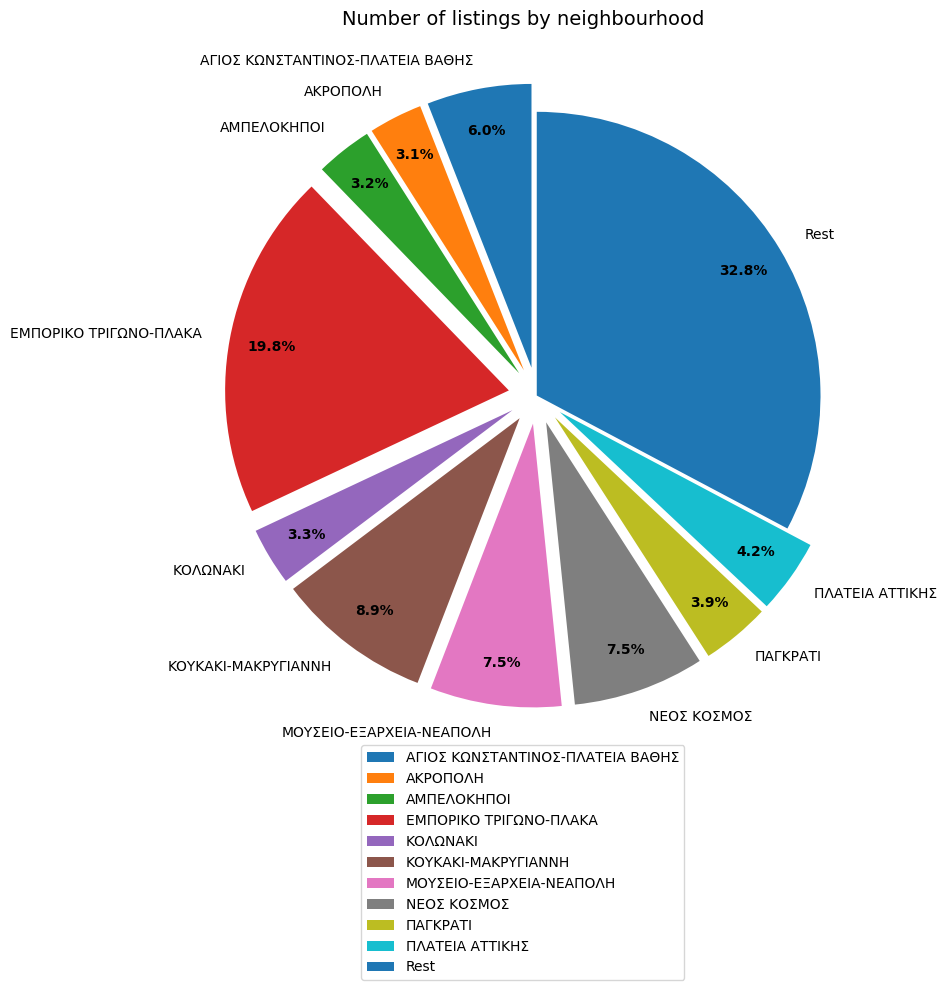

In [16]:
threshold = 3  # Set the threshold percentage for labeling

# Calculate the percentage of each neighbourhood
neighbourhood_percentages = (neighbourhood_counts / neighbourhood_counts.sum()) * 100

# Determine the key neighbourhoods above the threshold
key_neighbourhoods = neighbourhood_percentages[neighbourhood_percentages >= threshold]
other_neighbourhoods = neighbourhood_percentages[neighbourhood_percentages < threshold]

# Create a new DataFrame for pie chart data
pie_data = key_neighbourhoods.copy()
pie_data['Rest'] = other_neighbourhoods.sum()

# Calculate the explode list for key neighbourhoods
explode_list = [0.1] * len(key_neighbourhoods) + [0]

# Plot the pie chart with key value labels
plt.figure(figsize=(10, 10))

patches, text, autotexts = plt.pie(pie_data,
                                   labels=pie_data.index,
                                   autopct='%1.1f%%',
                                   startangle=90,
                                   shadow=False,
                                   pctdistance=0.85,
                                   explode=explode_list)

plt.setp(autotexts, size=10, weight='bold')  # Set font size and weight for percentage labels

plt.title('Number of listings by neighbourhood', fontsize=14, pad=20)
plt.axis('equal')

plt.legend(patches, pie_data.index, loc='upper center', bbox_to_anchor=(0.5, 0.0001))
# plt.legend(patches, pie_data.index, loc='upper left', bbox_to_anchor=(0.5, 1.5), bbox_transform=plt.gcf().transFigure)

plt.tight_layout()

plt.show()


As shown above, the neighbourhood "ΕΜΠΟΡΙΚΟ ΤΡΙΓΩΝΟ-ΠΛΑΚΑ" is clearly the one that contains the most number of listings. The "ΚΟΥΚΑΚΙ-ΜΑΚΡΥΓΙΑΝΝΗ" neighbourhood is the second on this list with fewer listings by approximately 11%. 

<span style="font-size:24px;"> **Histograms**</span>

Next, we will be creating two histograms. The first one will display how many listings belong to clusters separated by rating scores. For this purpose, we will be using the values contained in the 'review_scores_rating' column of the dataset. Below we print it's unique values into a list view.

In [17]:
df_listings.review_scores_rating.unique().tolist()

[4.82,
 4.86,
 4.79,
 4.67,
 4.83,
 4.66,
 4.92,
 nan,
 4.69,
 4.15,
 4.89,
 4.95,
 5.0,
 4.42,
 4.68,
 4.5,
 4.8,
 4.76,
 4.88,
 4.63,
 4.9,
 4.73,
 4.87,
 4.93,
 4.2,
 4.62,
 4.64,
 0.0,
 4.99,
 4.94,
 4.75,
 4.97,
 4.7,
 4.77,
 4.61,
 4.3,
 4.85,
 4.91,
 4.55,
 4.56,
 4.84,
 4.78,
 4.81,
 4.47,
 4.71,
 4.72,
 4.0,
 4.53,
 4.54,
 4.08,
 4.57,
 4.09,
 4.65,
 4.98,
 4.74,
 3.83,
 4.28,
 4.58,
 4.38,
 4.43,
 4.96,
 4.6,
 4.33,
 4.59,
 4.45,
 4.48,
 4.4,
 4.51,
 4.25,
 4.52,
 2.0,
 3.88,
 4.39,
 3.33,
 4.49,
 4.14,
 3.0,
 4.27,
 3.89,
 3.5,
 4.44,
 4.22,
 4.31,
 1.0,
 4.11,
 4.29,
 2.6,
 4.41,
 4.17,
 4.24,
 4.36,
 4.35,
 4.34,
 4.18,
 4.46,
 2.5,
 3.2,
 3.67,
 4.32,
 3.75,
 4.13,
 3.7,
 4.1,
 4.26,
 4.37,
 3.63,
 3.94,
 3.91,
 4.04,
 4.16,
 4.02,
 3.84,
 4.23,
 4.07,
 4.05,
 3.92,
 3.77,
 3.98,
 3.53,
 4.19,
 4.01,
 4.21,
 3.56,
 3.46,
 3.86,
 3.57,
 3.6,
 3.43,
 3.78,
 3.73,
 3.36,
 3.14,
 4.06,
 4.03,
 3.8,
 3.79,
 3.59,
 2.8,
 3.82,
 2.33,
 3.17,
 3.29,
 1.5,
 2.75,
 3.25,
 3.4]

Using Numpy's 'histogram' method, we can get the bin ranges and corresponding counts.

In [18]:
counts, bin_ranges = np.histogram(df_listings['review_scores_rating'].dropna())

print(counts) # frequency count
print(bin_ranges) # bin ranges, default = 10 bins

[  17    0   45    2   28   17   74  140  846 8275]
[0.  0.5 1.  1.5 2.  2.5 3.  3.5 4.  4.5 5. ]


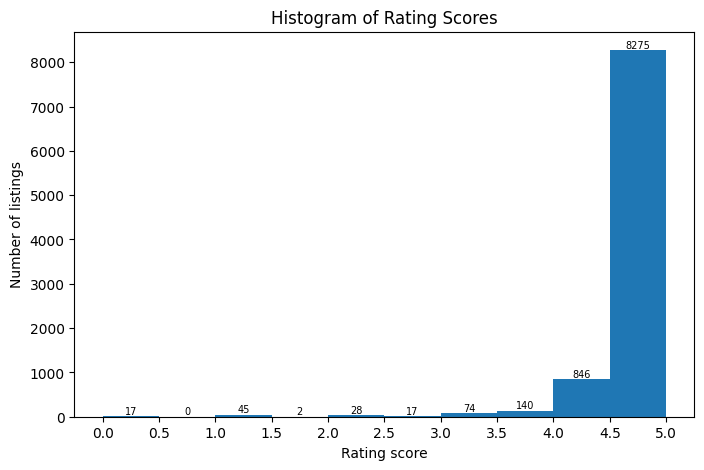

In [19]:
df_listings['review_scores_rating'].plot(kind='hist', figsize=(8, 5), xticks=bin_ranges)

plt.title('Histogram of Rating Scores')
plt.ylabel('Number of listings')
plt.xlabel('Rating score')

# Add labels to the chart
bin_width = (bin_ranges[1] - bin_ranges[0])  # Calculate the width of each bin
for count, bin_range in zip(counts, bin_ranges):
    label_x = bin_range + bin_width / 2  # Calculate the x-position for the label
    plt.text(label_x, count, str(count), ha='center', va='bottom', fontsize=7)

plt.show()

In the above graph we notice that the vast majority of the listings are placed in high review scores, as 8.275 out of 9.442 (87,6%) have received review scores between 4.5-5.0, and another 846 (8,9%) between 4.0-4.5.

By examining the next histogram, we can gain insights into the popularity and engagement of the listings. It helps us understand how many listings have received a certain number of reviews.

For example, we can observe the concentration of listings with a low number of reviews compared to those with a high number of reviews. This information can be useful in understanding the level of engagement and feedback from guests for different listings.

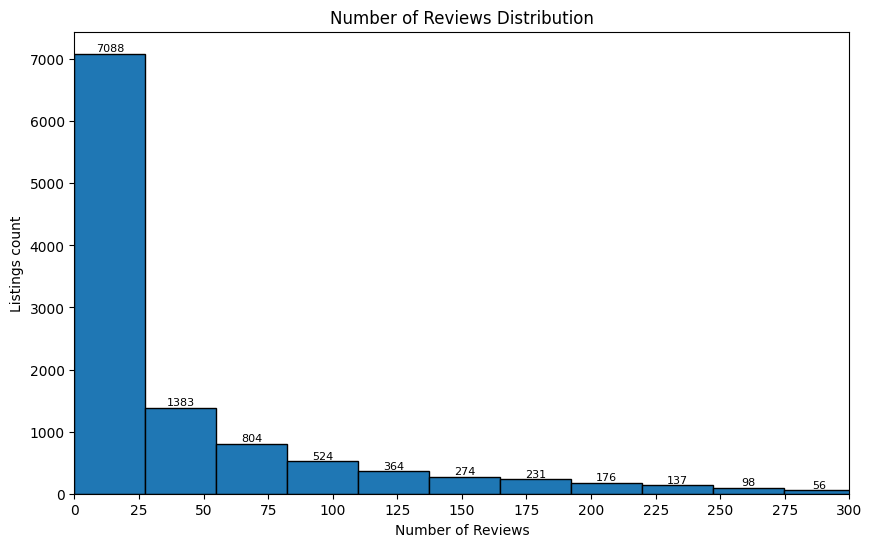

In [20]:
counts, bin_ranges = np.histogram(df_listings['number_of_reviews'], bins=30)

plt.figure(figsize=(10, 6))
plt.hist(df_listings['number_of_reviews'], bins=30, edgecolor='k')

plt.title('Number of Reviews Distribution')
plt.xlabel('Number of Reviews')
plt.ylabel('Listings count')
plt.xlim(0, 300)  # Adjust the x-axis limits
plt.xticks(range(0, 301, 25))  # Set x-axis tick positions and labels
# plt.grid(axis='y', alpha=0.5)  # Add horizontal grid lines

# Add labels to the chart
bin_width = (bin_ranges[1] - bin_ranges[0])  # Calculate the width of each bin
for count, bin_range in zip(counts, bin_ranges):
    label_x = bin_range + bin_width / 2  # Calculate the x-position for the label
    plt.text(label_x, count, str(count), ha='center', va='bottom', fontsize=8, clip_on=True)

plt.show()

This distribution above reveals that a significant part of listings (76%) have received less than approximately 55 reviews.

<span style="font-size:24px;"> **Scatter Plot**</span>

We move on to create a scatter plot, which will examine the relationship between the price of the listings and the review scores ratings.

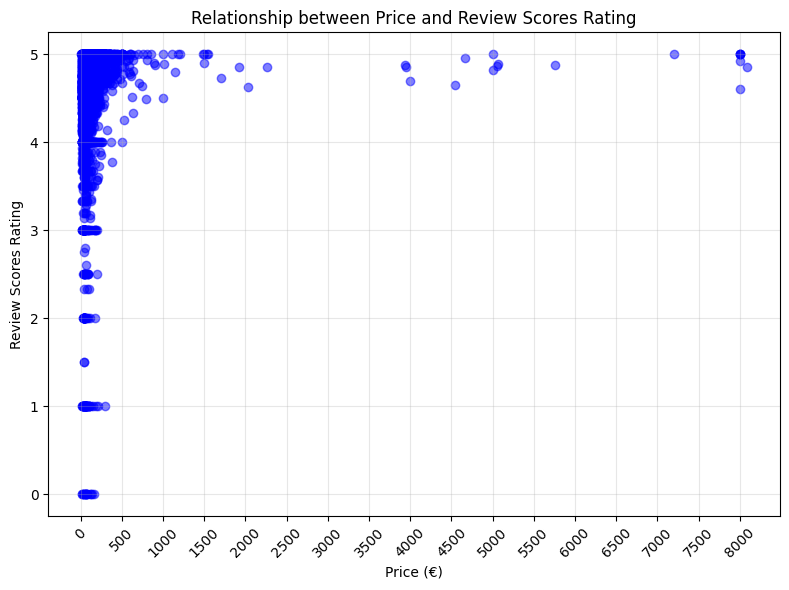

In [21]:
plt.figure(figsize=(8, 6))
plt.scatter(df_listings['price'], df_listings['review_scores_rating'], c='blue', alpha=0.5)
plt.xlabel('Price (€)')
plt.ylabel('Review Scores Rating')
plt.title('Relationship between Price and Review Scores Rating')
plt.grid(True)

ticker_values = list(range(0, 8001, 500))
plt.xticks(ticker_values)

# Rotate the x-axis tick labels to 45 degrees
plt.xticks(rotation=45)

# Set the transparency of the grid lines
plt.grid(alpha=0.3)

plt.tight_layout()

plt.show()

Besides verifying that most listings have rating scores > 4.0 as we found previously, this scatter plot also indicates that Airbnb listings with approximate price > €500 have not received review scores less than ~ 4.0.

<span style="font-size:24px;"> **Box Plots**</span>

As a next step, we will create a box plot of the prices found in the whole dataset.

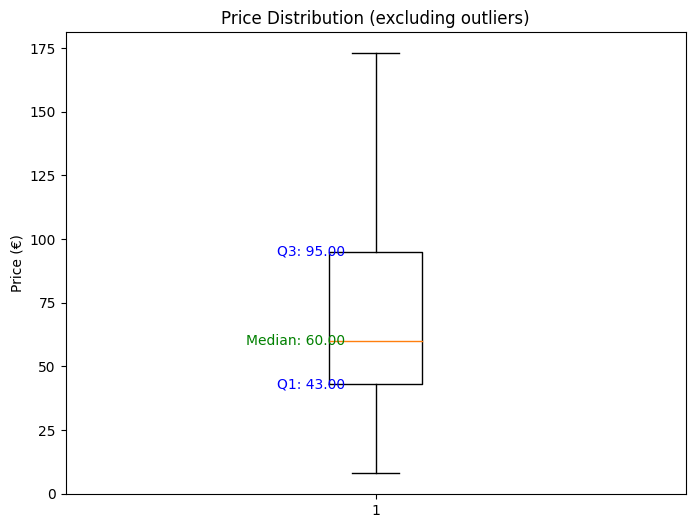

In [22]:
plt.figure(figsize=(8, 6))
boxplot = plt.boxplot(df_listings['price'], showfliers=False)
plt.title('Price Distribution (excluding outliers)')
plt.ylabel('Price (€)')

# Add value labels for Q1, Q3, and median
labels = ['Q1', 'Q3', 'Median']
q1_value = np.percentile(df_listings['price'], 25)
q3_value = np.percentile(df_listings['price'], 75)
median_value = np.median(df_listings['price'])

values = [q1_value, q3_value, median_value]
colors = ['blue', 'blue', 'green']

for label, value, color in zip(labels, values, colors):
    plt.text(0.95, value, f'{label}: {value:.2f}', ha='right', va='center', color=color)

plt.show()


Furthermore, we are displaying box plots for the top 4 neighbourhoods to examine details regarding their pricing.

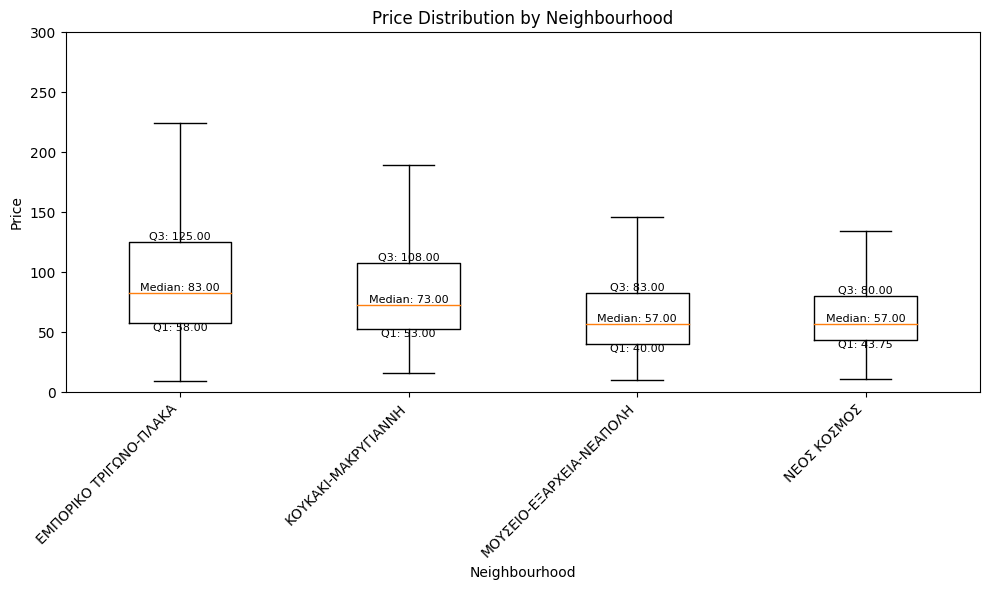

In [23]:
# Select the top 4 highly priced neighbourhoods
important_neighborhoods = ['ΕΜΠΟΡΙΚΟ ΤΡΙΓΩΝΟ-ΠΛΑΚΑ', 'ΚΟΥΚΑΚΙ-ΜΑΚΡΥΓΙΑΝΝΗ', 'ΜΟΥΣΕΙΟ-ΕΞΑΡΧΕΙΑ-ΝΕΑΠΟΛΗ', 'ΝΕΟΣ ΚΟΣΜΟΣ']

# Filter the data to include only the selected neighborhoods
filtered_data = df_listings[df_listings['neighbourhood_cleansed'].isin(important_neighborhoods)]

# Create a box plot for each neighborhood
plt.figure(figsize=(10, 6))
boxplot = plt.boxplot(
    [filtered_data[filtered_data['neighbourhood_cleansed'] == neighborhood]['price'] for neighborhood in important_neighborhoods],
    labels=important_neighborhoods,
    showfliers=False
)
plt.title('Price Distribution by Neighbourhood')
plt.xlabel('Neighbourhood')
plt.ylabel('Price')
plt.ylim(0, 300)  # Adjust the y-axis limits to 300

# Rotate the x-axis labels by 45 degrees
plt.xticks(rotation=45, ha='right')

# Add value labels for each box plot
for i, neighborhood in enumerate(important_neighborhoods):
    median = boxplot['medians'][i].get_ydata()[0]
    q1 = boxplot['boxes'][i].get_ydata()[0]
    q3 = boxplot['boxes'][i].get_ydata()[2]
    plt.text(i + 1, median, f'Median: {median:.2f}', ha='center', va='bottom', fontsize=8)
    plt.text(i + 1, q1, f'Q1: {q1:.2f}', ha='center', va='top', fontsize=8)  # Adjust the vertical alignment
    plt.text(i + 1, q3, f'Q3: {q3:.2f}', ha='center', va='bottom', fontsize=8)

plt.tight_layout()
plt.show()


ΕΜΠΟΡΙΚΟ ΤΡΙΓΩΝΟ-ΠΛΑΚΑ
We notice that the median price (83) is closer to Q1 (58) than to Q3 (125). This suggests a potential left-skewed distribution, indicating that there may be a higher concentration of listings with lower prices compared to higher prices in this neighbourhood.

ΚΟΥΚΑΚΙ-ΜΑΚΡΥΓΙΑΝΝΗ
Here the median price (73) is closer to Q1 (53) than to Q3 (108). As above, we conclude that there might be a higher concentration of listings with lower prices compared to higher prices in this neighbourhood, as well.

ΜΟΥΣΕΙΟ-ΕΞΑΡΧΕΙΑ-ΝΕΑΠΟΛΗ
Same as above.

ΝΕΟΣ ΚΟΣΜΟΣ
Same as above.

After completing the basic analysis of the "listings.csv.gz" dataset, we move on to explore the "calendar.csv.gz" dataset.
Again, we download and export it to 'calendar.csv' and then turn it into a pandas dataframe first.

In [24]:
df_calendar = pd.read_csv('calendar.csv')

# Output object type
type(df_calendar)

pandas.core.frame.DataFrame

We print the first 3 rows.

In [25]:
df_calendar.head(3)

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,571492,2023-03-28,t,$465.00,$465.00,3.0,1125.0
1,571492,2023-03-29,t,$465.00,$465.00,3.0,1125.0
2,571492,2023-03-30,t,$465.00,$465.00,3.0,1125.0


In [26]:
df_calendar.dtypes

listing_id          int64
date               object
available          object
price              object
adjusted_price     object
minimum_nights    float64
maximum_nights    float64
dtype: object

As a preprocessing of the dataset, we are converting the 'date' column from object to datetime format. Additionally, we remove the '$' symbol from the 'price' column and convert it to float, as we did in the previous dataset.

In [27]:
df_calendar['date'] = pd.to_datetime(df_calendar['date'])
df_calendar['price'] = df_calendar['price'].replace('[\$,]', '', regex=True).astype(float)

We check if the changes have been applied properly.

In [28]:
df_calendar.dtypes

listing_id                 int64
date              datetime64[ns]
available                 object
price                    float64
adjusted_price            object
minimum_nights           float64
maximum_nights           float64
dtype: object

<span style="font-size:24px;"> **Area Plot**</span>

Next, we will create an area chart to visualize price changes over time.

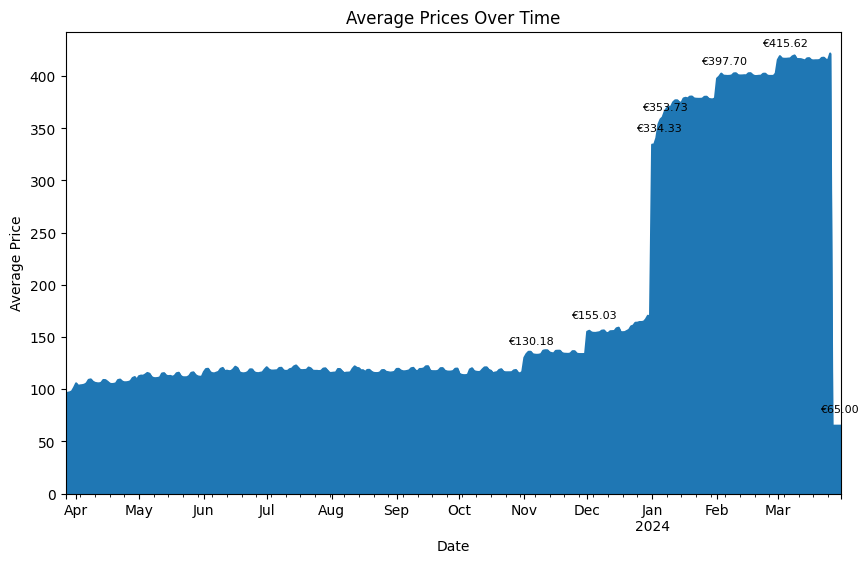

In [29]:
plt.figure(figsize=(10, 6))
calendar_avg_prices = df_calendar.groupby('date')['price'].mean()
calendar_avg_prices.plot(kind='area')
plt.title('Average Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Average Price')
plt.grid(False)

previous_price = None
label_threshold = 10

# Show key value labels for changing points
for date, price in calendar_avg_prices.items():
    if previous_price is not None and abs(price - previous_price) > label_threshold:
        plt.annotate(f"€{price:.2f}", (date, price), xytext=(5, 10), textcoords='offset points', ha='center', fontsize=8)
    previous_price = price

plt.show()


Based on the above chart, we notice a sudden spike in price values from December 2023 to January 2024, which does not seem to be justified based on our current knowledge of the Airbnb market.

On the other hand, the consistency of high pricing for the following months does not allow us to believe that these values can be outliers.

<span style="font-size:24px;"> **Map**</span>

The last step of our visualizations includes the listings placement on the map of Athens. With the use of the folium library, we first create a map of the city, as shown below.

In [30]:
# Athens latitude and longitude values
athens_coords = [37.983810, 23.727539]

map = folium.Map(location=athens_coords, zoom_start=11)

map

Next, we need to remove any rows in the dataset that have missing or NaN values in the 'latitude' or 'longitude' columns.

In [31]:
df_listings.dropna(subset=['latitude', 'longitude'], axis=0, inplace=True)

df_listings.shape

(11382, 72)

We group the markers into different clusters. Each cluster is then represented by the number of listings in this area.

To implement this, we start off by instantiating a *MarkerCluster* object and adding all the data points in the dataframe to this object.

In [32]:
from folium import plugins

# Create a clean copy of the Athens map
athens_map = folium.Map(location = athens_coords, zoom_start = 12)

# create a marker cluster object for the listings
listings = plugins.MarkerCluster().add_to(athens_map)

# add each listing to the listings marker cluster
for lat, lng in zip(df_listings.latitude, df_listings.longitude):
    folium.Marker(
        location=[lat, lng],
        icon=None,
    ).add_to(listings)

# display the map
athens_map

It is clear by the above map that almost all listings appear to be gathered around the city center, with few of them being also spread towards the northern suburbs.

This visual concludes our basic visual analysis of the Athens, Greece AirBnB listings dataset.